In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
file = pd.read_csv('raw_data.csv')
file.head()
# print(file.shape)

,ID,Category,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Engine,Gearbox,Price,Location,Contact
0,Mã: 4132055,Xe mới 2022,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0 Km,Trắng,Kem,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 49 Triệu,Hà Nội,Liên hệ: Lê Thị Vân Hà Nội Hà Nội ĐT: 0988 92...
1,Mã: 3868971,Xe mới 2022,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0 Km,Trắng,Màu khác,5 cửa,7 chỗ,Xăng\t1.3 L,Số tự động,1 Tỷ 989 Triệu,Hà Nội,"Liên hệ: Lê Thị Vân 46 Láng Hạ, Láng Hạ, Đống..."
2,Mã: 3798561,Xe mới 2022,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0 Km,Xanh,-,5 cửa,7 chỗ,Xăng\t1.5 L,Số tự động,1 Tỷ 83 Triệu,Hà Nội,Liên hệ: Honda ô tô An Khánh Km9a+800 Đại Lộ ...
3,Mã: 4198231,Xe mới 2022,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0 Km,Đỏ,Đen,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,925 Triệu,Hà Nội,"Liên hệ: Hyundai Cầu Diễn Ô 2 - Lô 1, Cụm CN ..."
4,Mã: 4297072,Xe cũ 2021,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0 Km,Đen,Đen,4 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 879 Triệu,Hà Nội,Liên hệ: Mercedes - Benz An Du Hà Nội - Used ...


In [27]:
sns.set_theme()
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1980 non-null   object
 1   Category       1980 non-null   object
 2   Name           1980 non-null   object
 3   Assemble       1980 non-null   object
 4   Type           1980 non-null   object
 5   Km             1980 non-null   object
 6   CarColor       1980 non-null   object
 7   InteriorColor  1980 non-null   object
 8   CarDoor        1980 non-null   object
 9   CarSeat        1980 non-null   object
 10  Engine         1980 non-null   object
 11  Gearbox        1980 non-null   object
 12  Price          1980 non-null   object
 13  Location       1980 non-null   object
 14  Contact        1980 non-null   object
dtypes: object(15)
memory usage: 232.2+ KB


Dataset khi crawl về gồm có 15 cột:
- ID: Mã xe                                 
- Category: Các loại xe và năm đăng bán    
- Name: Tên xe                              
- Assemble: Lắp ráp                         
- Type: Các loại xe                         
- Km: Sô Km đã đi được                     
- CarColor: Màu xe                         
- InteriorColor: Màu nội thất 
- CarDoor: Số cửa
- CarSeat: Số chỗ ngồi
- Engine: Động cơ
- Gearbox: Hộp số
- Price: Giá tiền
- Location: Địa điểm bán xe
- Contact: Phương thức liên lạc

Loại bỏ các giá trị ID trùng nhau

In [28]:
file.drop_duplicates(subset=['ID'], inplace=True)
print(len(file))

1950


In [29]:
file.head()

,ID,Category,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Engine,Gearbox,Price,Location,Contact
0,Mã: 4132055,Xe mới 2022,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0 Km,Trắng,Kem,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 49 Triệu,Hà Nội,Liên hệ: Lê Thị Vân Hà Nội Hà Nội ĐT: 0988 92...
1,Mã: 3868971,Xe mới 2022,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0 Km,Trắng,Màu khác,5 cửa,7 chỗ,Xăng\t1.3 L,Số tự động,1 Tỷ 989 Triệu,Hà Nội,"Liên hệ: Lê Thị Vân 46 Láng Hạ, Láng Hạ, Đống..."
2,Mã: 3798561,Xe mới 2022,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0 Km,Xanh,-,5 cửa,7 chỗ,Xăng\t1.5 L,Số tự động,1 Tỷ 83 Triệu,Hà Nội,Liên hệ: Honda ô tô An Khánh Km9a+800 Đại Lộ ...
3,Mã: 4198231,Xe mới 2022,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0 Km,Đỏ,Đen,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,925 Triệu,Hà Nội,"Liên hệ: Hyundai Cầu Diễn Ô 2 - Lô 1, Cụm CN ..."
4,Mã: 4297072,Xe cũ 2021,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0 Km,Đen,Đen,4 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 879 Triệu,Hà Nội,Liên hệ: Mercedes - Benz An Du Hà Nội - Used ...


Loại bỏ các cột không cần thiết trong quá trình xử lý

In [30]:
file = file.drop(labels=["ID","Contact"], axis = 1)
file.head()

,Category,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Engine,Gearbox,Price,Location
0,Xe mới 2022,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0 Km,Trắng,Kem,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 49 Triệu,Hà Nội
1,Xe mới 2022,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0 Km,Trắng,Màu khác,5 cửa,7 chỗ,Xăng\t1.3 L,Số tự động,1 Tỷ 989 Triệu,Hà Nội
2,Xe mới 2022,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0 Km,Xanh,-,5 cửa,7 chỗ,Xăng\t1.5 L,Số tự động,1 Tỷ 83 Triệu,Hà Nội
3,Xe mới 2022,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0 Km,Đỏ,Đen,5 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,925 Triệu,Hà Nội
4,Xe cũ 2021,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0 Km,Đen,Đen,4 cửa,5 chỗ,Xăng\t2.0 L,Số tự động,2 Tỷ 879 Triệu,Hà Nội


Phân loại tình trạng của xe và phân theo 2 loại Status(Trang thái) và Year(Năm đăng bán)

In [31]:
file['Category'] = file['Category'].apply(lambda x : x.strip(' Xe ').replace(' ', ''))
file['Status'] = file['Category'].apply(lambda a : a[:-4].replace('<',''))
file.drop(labels = ['Category'], axis = 1, inplace = True)

Xử lý Km đi được 

In [32]:
file['Km'] = file['Km'].apply(lambda x : x.replace(',', '').replace(' ','').replace('Km',''))

Phân cột Engine thành 2 cột là cột EngineCar và Capacity(Dung tích)

In [33]:
print(file['Engine'].unique())
file['Engine'] = file['Engine'].apply(lambda x : x.strip().split('\t'))

['Xăng\t2.0 L' 'Xăng\t1.3 L' 'Xăng\t1.5 L' 'Xăng\t3.0 L' 'Xăng\t1.25 L'
 'Dầu\t2.0 L' 'Xăng\t1.4 L' 'Xăng\t2.5 L' 'Dầu\t2.5 L' 'Xăng\t2.7 L'
 'Dầu\t2.2 L' 'Xăng\t4.8 L' 'Hybrid\t3.5 L' 'Xăng\t1.6 L' 'Xăng\t3.5 L'
 'Xăng\t3.2 L' 'Xăng\t1.8 L' 'Dầu\t1.9 L' 'Xăng\t5.7 L' 'Xăng\t4.6 L'
 'Xăng\t3.8 L' 'Dầu\t2.4 L' 'Xăng\t1.2 L' 'Xăng\t1.0 L' 'Xăng'
 'Điện\t0.1 L' 'Xăng\t4.5 L' 'Dầu\t3.0 L' 'Xăng\t3.6 L' 'Xăng\t2.3 L'
 'Xăng\t2.4 L' 'Xăng\t4.7 L' 'Xăng\t4.0 L' 'Hybrid\t1.8 L' 'Xăng\t5.0 L'
 'Dầu\t2.1 L' 'Điện\t0.2 L' 'Xăng\t3.4 L' 'Dầu\t3.2 L' 'Dầu' 'Xăng\t3.3 L'
 'Xăng\t6.8 L' 'Hybrid\t2.5 L' 'Xăng\t3.7 L' 'Xăng\t6.6 L' 'Xăng\t2.6 L'
 'Dầu\t5.2 L' 'Dầu\t2.8 L' 'Dầu\t2.7 L' 'Xăng\t2.9 L' 'Xăng\t1.1 L'
 'Xăng\t5.3 L' '-' 'Dầu\t4.2 L' 'Xăng\t5.6 L' 'Xăng\t6.0 L' 'Xăng\t6.2 L'
 'Dầu\t2.3 L' 'Xăng\t6.7 L' 'Hybrid']


In [34]:
def convert_First(first):
    if len(first)<2:
        first.append("0.0 L")
        return str(first[0])
    else:
        return str(first[0])
def convert_Second(second):
    return str(second[1])
file['EngineCar'] = file['Engine'].apply(convert_First)
file['Capacity'] = file['Engine'].apply(convert_Second) 
file.drop(labels = ['Engine'], axis = 1, inplace = True)
file['Capacity'] = file['Capacity'].apply(lambda x : x.replace(' L', ''))
file.head()

,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity
0,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0,Trắng,Kem,5 cửa,5 chỗ,Số tự động,2 Tỷ 49 Triệu,Hà Nội,mới,Xăng,2.0
1,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0,Trắng,Màu khác,5 cửa,7 chỗ,Số tự động,1 Tỷ 989 Triệu,Hà Nội,mới,Xăng,1.3
2,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0,Xanh,-,5 cửa,7 chỗ,Số tự động,1 Tỷ 83 Triệu,Hà Nội,mới,Xăng,1.5
3,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5 cửa,5 chỗ,Số tự động,925 Triệu,Hà Nội,mới,Xăng,2.0
4,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0,Đen,Đen,4 cửa,5 chỗ,Số tự động,2 Tỷ 879 Triệu,Hà Nội,cũ,Xăng,2.0


Xử lý dữ liệu giá và chuyển thành đơn vị Triệu

In [35]:
def convertPrice(price):
    if 'Tỷ' in price and 'Triệu' in price:
        return int(price[0])*1000 + int(price[2])
  
    elif 'Tỷ' in price:
        return int(price[0])*1000
  
    else:
        return int(price[0])
file['Price'] = file['Price'].apply(lambda x : x.strip().split())
file['Price'] = file['Price'].apply(convertPrice)

Thêm 1 cột Trademark(Nhãn hàng) từ cột Name

In [36]:
def convertName(name):
    if(name[0] == "Rolls") or (name[0] == "Mini"):
        return str(name[0])+" "+str(name[1])
    else:
        return str(name[0])
def converProduction_year(year):
    return str(year[len(year)-1])
file['Trademark'] = file['Name'].apply(lambda x : x.strip().split())
file['ProductionYear'] = file['Trademark'].apply(converProduction_year)
file['Trademark'] = file['Trademark'].apply(convertName)

In [37]:
file['CarDoor'] = file['CarDoor'].apply(lambda x : x.replace(' cửa',''))
file['CarSeat'] = file['CarSeat'].apply(lambda x : x.replace(' chỗ',''))
file.head()

,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0,Xanh,-,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [38]:
print(file["InteriorColor"].unique())
print(file["CarSeat"].unique())
print(file["EngineCar"].unique())

['Kem' 'Màu khác' '-' 'Đen' 'Nâu' 'Ghi' 'Nhiều màu' 'Vàng' 'Xám' 'Đỏ'
 'Trắng' 'Cam' 'Bạc']
['5' '7' '4' '8' '16' '3' '6' '2' '10' '9' '0']
['Xăng' 'Dầu' 'Hybrid' 'Điện' '-']


In [39]:
# Thay thế các dữ liệu - trong màu nội thất bằng mode
color = file["InteriorColor"].mode()[0]
file["InteriorColor"] = file["InteriorColor"].apply(lambda x : x.replace('-',color))
# Chuyển CarSeat sang kiểu int
file["CarSeat"] = file["CarSeat"].astype(int)
# Thay thế các dữ liệu 0 trong số chỗ ngồi bằng mode
carseat = file["CarSeat"].mode()[0]    
file["CarSeat"] = file["CarSeat"].replace(0,carseat)
# Thay thế các dữ liệu - trong loai đồng cơ bằng mode
color = file["EngineCar"].mode()[0]
file["EngineCar"] = file["EngineCar"].apply(lambda x : x.replace('-',color))
file.head()

,Name,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Mercedes Benz GLC 200 4Matic - 2022,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Mercedes Benz GLB 200 AMG - 2022,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Honda CRV L - 2022,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Hyundai Tucson 2.0 AT Đặc biệt - 2022,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Mercedes Benz E class E300 AMG - 2021,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


Đổi các dữ liệu cần thiết sang dạng số

In [40]:
file["Km"] = file["Km"].astype(int)
file["CarDoor"] = file["CarDoor"].astype(int)
file["CarSeat"] = file["CarSeat"].astype(int)
file["ProductionYear"] = file["ProductionYear"].astype(int)
file["Capacity"] = file["Capacity"].astype(float)

Ghi dữ liệu vào file "data_clean.csv"

In [41]:
# file.to_csv(r'data_clean.csv', index=False)
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1979
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1950 non-null   object 
 1   Assemble        1950 non-null   object 
 2   Type            1950 non-null   object 
 3   Km              1950 non-null   int32  
 4   CarColor        1950 non-null   object 
 5   InteriorColor   1950 non-null   object 
 6   CarDoor         1950 non-null   int32  
 7   CarSeat         1950 non-null   int32  
 8   Gearbox         1950 non-null   object 
 9   Price           1950 non-null   int64  
 10  Location        1950 non-null   object 
 11  Status          1950 non-null   object 
 12  EngineCar       1950 non-null   object 
 13  Capacity        1950 non-null   float64
 14  Trademark       1950 non-null   object 
 15  ProductionYear  1950 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(10)
memory usage: 228.5+ KB


Sau khi đã làm sạch dữ liệu thì hiện giờ dataset có tổng 16 cột

### Mô tả trực quan về các đặc trưng

<AxesSubplot:title={'center':'Distribution'}, ylabel='Status'>

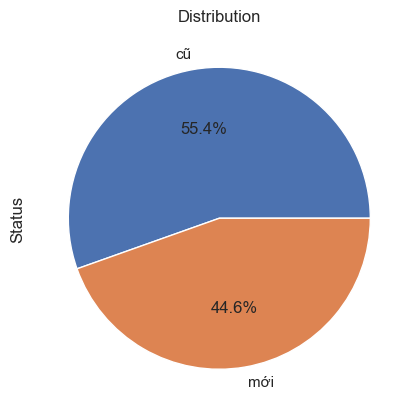

In [42]:
plt.figure(1, figsize=(5,5), dpi = 100)
plt.title("Distribution")
file['Status'].value_counts().plot.pie(autopct="%1.1f%%")

Nhận Xét: 
- Đồ thị biểu diễn số lượng phần trăm số lượng xe mới so với xe cũ trên dataset mà chúng ta crawl về 
- Phần trăm xe mới là 44.6 %, phần trăm xe cũ 55.4% 
- Điều đó thể hiện số lượng xe mới và cũ cần bán là gần bằng nhau 

<AxesSubplot:xlabel='Price', ylabel='Count'>

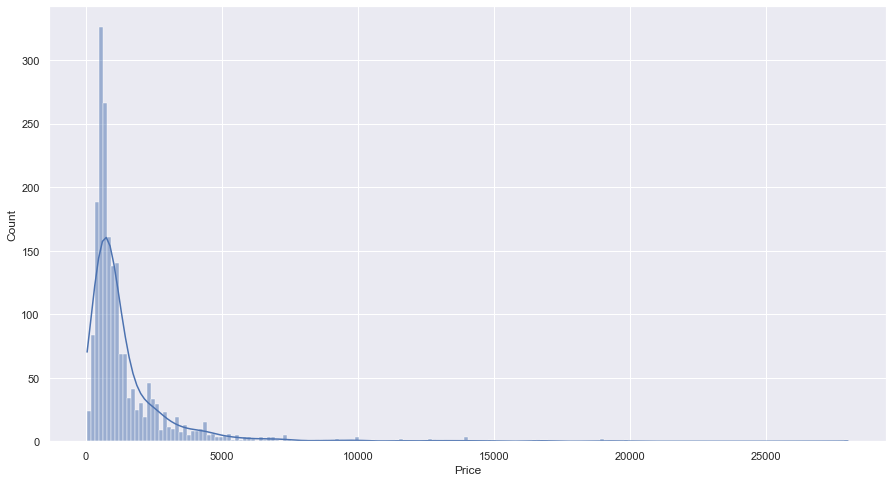

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.histplot(file['Price'],kde=True)

Nhận xét: 
- Đồ thị biểu diễn cho giá tiền của tất cả các xe đăng bán trong dataset
- Giá xe được dăng bán nhiều nhất nằm trong khoản từ 0 -> 5 tỷ và nhiều nhất từ khoảng 2 tỷ

<AxesSubplot:xlabel='Type', ylabel='Price'>

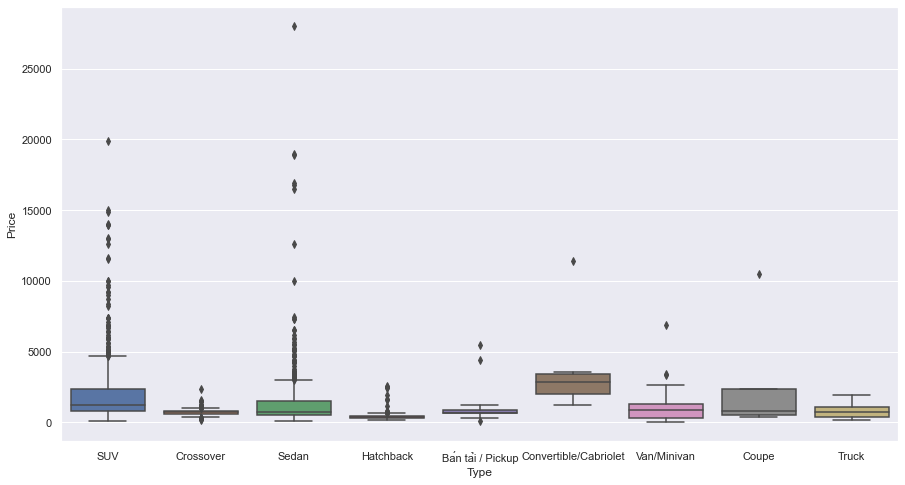

In [44]:
#Đồ thị biểu diễn mối quan hệ của đặc trưng Type và Price
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(x=file['Type'], y=file['Price'])

Nhận xét: 
- Đồ thị biểu diễn loại xe dựa trên giá tiền
- Có 9 loại xe trong dataset
- Gía trung bình cao nhất của SUV tầm 5 tỷ, Crossover tầm 1.5 tỷ, Sedan 3 tỷ, Hatchback 1.3 tỷ, Pickup 1.5 tỷ, Convertible tầm 3 tỷ, Van/Minivan tầm 2.5 tỷ, Couple 2.4 tỷ, Truck tầm
2.3 tỷ
- Ngoài ra còn có nhiều giá cao hơn giá trị trung bình, nhiều nhất là ở SUV và Sedan 

<AxesSubplot:xlabel='CarDoor', ylabel='Price'>

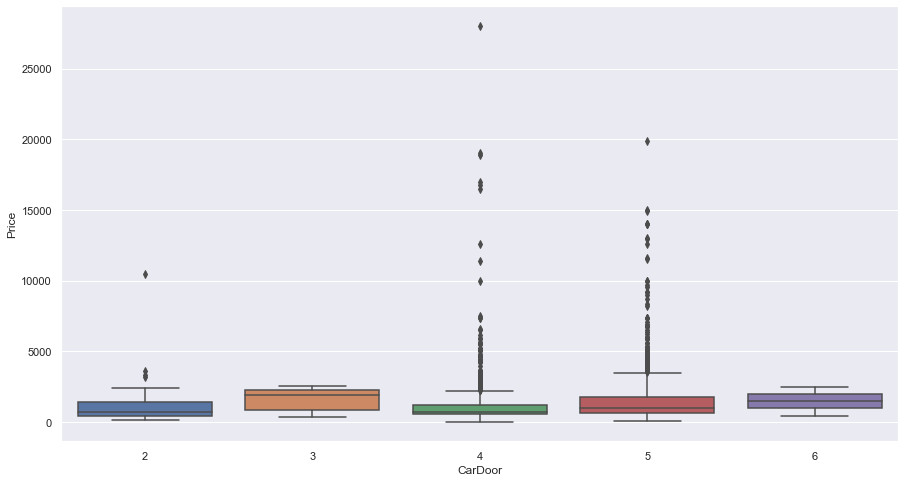

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(x=file['CarDoor'], y=file['Price'])

Nhận xét: 
- Đồ thị biểu diễn số cửa dựa trên giá tiền
- Có 5 loại cửa trong dataset
- Gía trung bình cao nhất của 2 cửa tầm 2.5 tỷ, 3 cửa tầm 2.5 tỷ, 4 của 2.4 tỷ, 5 cửa 3 tỷ, 6 cửa 2.5 tỷ
- Ngoài ra còn có nhiều giá cao hơn giá trị trung bình, nhiều nhất là ở 4 cửa là 5 cửa
- Từ đó suy ra được xu thế hiện nay thường các xe có tầm 4 đến 5 cửa được ưa thích hơn nên mới có giá cao hơn so với bình thường

[Text(0.5, 1.0, 'Số lượng xe nhãn hiệu'), Text(0.5, 0, 'Count')]

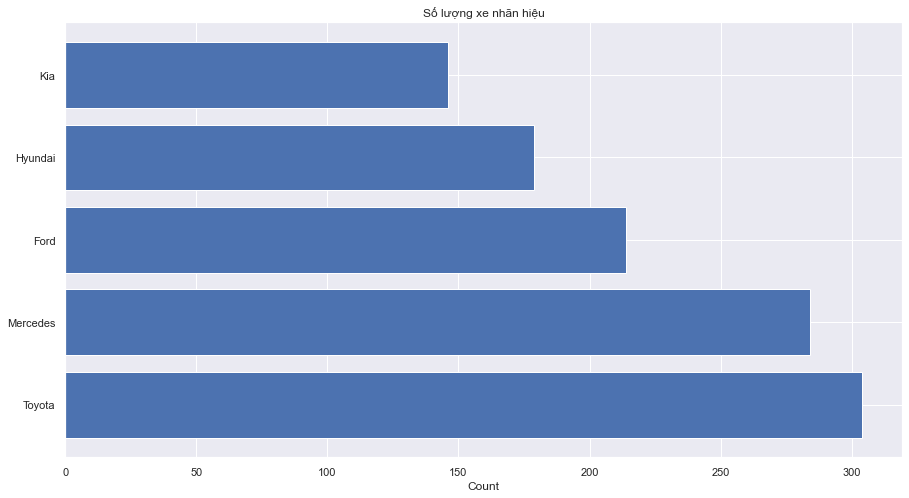

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Print the total number of unique categories
num_categories = file['Trademark'].nunique()
# Count the number of apps in each 'Trademark'. 
num_apps_in_category = file['Trademark'].value_counts()
# print(num_apps_in_category)
ax.barh(num_apps_in_category.index[:5],num_apps_in_category.values[:5])
ax.set(title="Số lượng xe nhãn hiệu",xlabel='Count')

Nhận xét: 
- Đồ thị biểu diễn số lượng xe dựa trên nhãn hiệu
- Số xe của nhãn hiệu Mercedes xấp xỉ bằng số lượng xe thuộc nhãn hiệu Toyota 
- Các xe thuộc các thể loại thuộc top 5 có số lượng gần bằng nhãn hiệu đứng trên nó

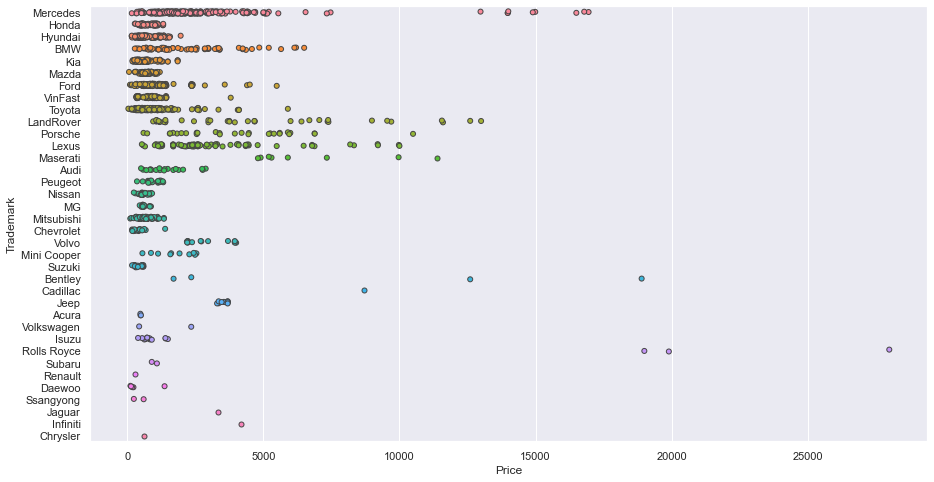

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = file['Price'], y = file['Trademark'], jitter=True, linewidth=1)

Nhận xét: 
- Đồ thị biểu diễn giá tiền dựa trên các hãng xe
- Trong đó Rolls Royce tuy có số lượng đăng bán ít nhưng giá tiền rất cao, có xe cao nhất vào 28 Tỷ

[Text(0.5, 1.0, 'Số lượng xe theo màu'), Text(0.5, 0, 'Count')]

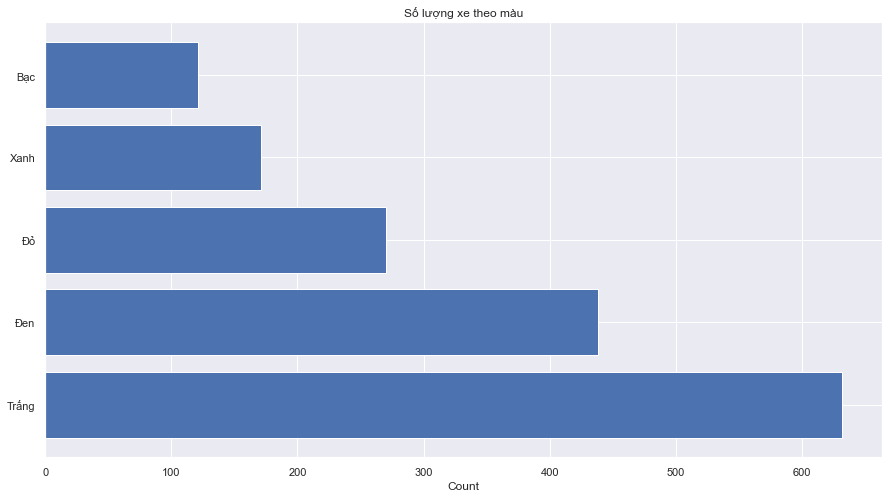

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# Print the total number of unique categories
num_categories = file['CarColor'].nunique()
# Count the number of apps in each 'CarColor'. 
num_apps_in_category = file['CarColor'].value_counts()
# print(num_apps_in_category)
ax.barh(num_apps_in_category.index[:5],num_apps_in_category.values[:5])
ax.set(title="Số lượng xe theo màu",xlabel='Count')

Nhận xét: 
- Đồ thị trên biểu diễn số xe theo màu
- Các loại xe có màu trắng được đăng bán nhiều nhất só lượng gần 650 xe
- Xếp sau đó là màu đen thấp hơn khoảng 200 xe